In [1]:
import pandas as pd
import numpy as np
import pickle
from time import time
from pprint import PrettyPrinter

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
pp = PrettyPrinter()

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Train/Test Split

In [2]:
df = pd.read_csv('data/application_train_pca.csv')
df.head()

,sk_id_curr,target,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,35,36,37
0,100002,1,0.311091,-1.332634,-0.399883,-2.000222,0.390812,0.672156,-0.191782,1.242912,...,0.094919,0.108869,-0.097447,0.207195,1.110724,-0.885310,0.271509,0.201748,0.078745,-1.013988
1,100003,0,1.003885,2.295670,-0.859131,-1.410614,0.350578,-0.441695,1.138504,-0.655109,...,0.215964,0.051572,0.488226,-0.041404,-0.785569,1.252293,1.370241,-0.178892,-0.732245,0.653229
2,100004,0,-0.356299,-2.745839,0.603927,-0.145268,2.845680,-0.206305,-1.628813,-0.740097,...,-0.140227,0.215135,-0.424872,0.097197,0.123388,0.143478,0.539556,0.226337,-0.640607,-1.492682
3,100006,0,-0.452229,-0.706371,-1.026894,-1.142946,-0.490824,-0.542183,-0.185623,0.939177,...,0.015248,-0.032642,-0.234938,-0.217559,0.080454,-0.554469,-0.494474,0.734851,-0.315487,0.781315
4,100007,0,0.396743,-0.732436,2.179659,-0.024886,1.154158,2.721180,-2.287210,0.657978,...,0.434943,0.120781,-0.307910,-0.718415,-0.035805,-1.283724,0.026249,0.483156,2.127985,-0.200012


In [3]:
train = df[df.columns[2:]]
target = df['target']

# Modeling

In [4]:
def model_fit(model, train, target, timed=True, feature_importance=False):
    '''
    This function is for checking performance of a single model. 
    
    Optional plot of feature importance for ensemble methods.
    '''
    # Fit and Predict
    if timed:
        start = time()
        passed = time() - start
        print(f'Seconds to start: {passed:.2f}')
    model.fit(train, target)
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')
    
    # CV
    cv_score = cross_validation.cross_val_score(model, train, target, cv=5, scoring='roc_auc')
    print(f'CV Score : Mean - {np.mean(cv_score):.3f} | Std - {np.std(cv_score):.3f} | Min - {np.min(cv_score):.3f} | Max - {np.max(cv_score):.3f}')
    if timed:
        passed = time() - start
        print(f'Seconds to CV: {passed:.2f}')
    
    # Plots feature importance, for ensemble models only
    if feature_importance:
        feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Seconds to start: 0.00
Seconds to fit: 37.88
CV Score : Mean - 0.592 | Std - 0.002 | Min - 0.591 | Max - 0.595
Seconds to CV: 175.27


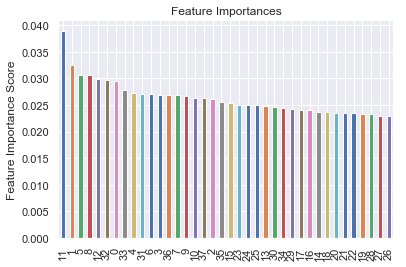

In [24]:
rfc = RandomForestClassifier(random_state=42)
model_fit(rfc, train, target, feature_importance=True)

In [5]:
def grid_searcher(model, train, target, parameters={}, cv=4, timed=True):
    '''
    Makes a printout of the AUC score for gridsearched models.
    '''
    if timed:
        start = time()
        passed = time() - start
        print(f'Seconds to start: {passed:.2f}')
    gsearcher = GridSearchCV(
        estimator=model, 
        param_grid=parameters,
        scoring='roc_auc',
        n_jobs=4,
        cv=cv)
    gsearcher.fit(train, target)
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')
    print('Grid Scores: \n')
    pp.pprint(gsearcher.cv_results_)
    print(f'Best Model Parameters: {gsearcher.best_params_}')
    print(f'Best Model Score: {gsearcher.best_score_:.4f}')

## Naive Bayes

For Funnsies

In [69]:
grid_searcher(GaussianNB(), train, target)

Seconds to start: 0.00
Seconds to fit: 2.61
Grid Scores: 

{'mean_fit_time': array([0.57424241]),
 'mean_score_time': array([0.16385829]),
 'mean_test_score': array([0.63585457]),
 'mean_train_score': array([0.63620212]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.66536437]),
 'split0_train_score': array([0.66500492]),
 'split1_test_score': array([0.63106633]),
 'split1_train_score': array([0.62473171]),
 'split2_test_score': array([0.62023497]),
 'split2_train_score': array([0.62882607]),
 'split3_test_score': array([0.6267519]),
 'split3_train_score': array([0.62624578]),
 'std_fit_time': array([0.10114609]),
 'std_score_time': array([0.02379337]),
 'std_test_score': array([0.01746852]),
 'std_train_score': array([0.01669361])}
Best Model Parameters: {}
Best Model Score: 0.6359


## Logistic Regression

Did a L1 Vs. L2 run. Same AUC (0.0688 w/ C=1.0). But took more than 10 times as long to fit, so don't use it.

In [73]:
parameters = {
    'C': [0.1, 1.0, 10.0]
}
grid_searcher(LogisticRegression(), train, target, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 35.96
Grid Scores: 

{'mean_fit_time': array([9.24557883, 9.22544372, 9.65600723]),
 'mean_score_time': array([0.05977499, 0.04733109, 0.04461986]),
 'mean_test_score': array([0.68782749, 0.68813003, 0.68814998]),
 'mean_train_score': array([0.68844141, 0.68868085, 0.68868879]),
 'param_C': masked_array(data=[0.1, 1.0, 10.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 0.1}, {'C': 1.0}, {'C': 10.0}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.68852682, 0.68875559, 0.68877045]),
 'split0_train_score': array([0.68811236, 0.68830688, 0.68830709]),
 'split1_test_score': array([0.68948963, 0.68989244, 0.68992319]),
 'split1_train_score': array([0.68782096, 0.68809091, 0.68810805]),
 'split2_test_score': array([0.68378984, 0.68411861, 0.68414445]),
 'split2_train_score': array([0.68981337, 0.69007042, 0.69007795]),
 'split3_test_score': array([0.68950

In [75]:
parameters = {
    'C': [10, 50, 100]
}
grid_searcher(LogisticRegression(), train, target, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 35.96
Grid Scores: 

{'mean_fit_time': array([9.73964375, 9.66589713, 9.00063419]),
 'mean_score_time': array([0.08108318, 0.05486774, 0.03736824]),
 'mean_test_score': array([0.68814998, 0.68815106, 0.68815127]),
 'mean_train_score': array([0.68868879, 0.68868899, 0.68868906]),
 'param_C': masked_array(data=[10, 50, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 10}, {'C': 50}, {'C': 100}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.68877045, 0.68877018, 0.68877025]),
 'split0_train_score': array([0.68830709, 0.68830707, 0.68830704]),
 'split1_test_score': array([0.68992319, 0.68992592, 0.68992636]),
 'split1_train_score': array([0.68810805, 0.68810904, 0.6881093 ]),
 'split2_test_score': array([0.68414445, 0.68414571, 0.68414621]),
 'split2_train_score': array([0.69007795, 0.69007792, 0.69007795]),
 'split3_test_score': array([0.68976177, 0

In [77]:
parameters = {
    'C': [100, 500, 1000]
}
grid_searcher(LogisticRegression(), train, target, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 36.33
Grid Scores: 

{'mean_fit_time': array([9.98389977, 9.73388952, 9.22305554]),
 'mean_score_time': array([0.05230355, 0.05861026, 0.04027176]),
 'mean_test_score': array([0.68815127, 0.6881513 , 0.68815128]),
 'mean_train_score': array([0.68868906, 0.68868914, 0.68868914]),
 'param_C': masked_array(data=[100, 500, 1000],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 100}, {'C': 500}, {'C': 1000}],
 'rank_test_score': array([3, 1, 2], dtype=int32),
 'split0_test_score': array([0.68877025, 0.68877006, 0.68876999]),
 'split0_train_score': array([0.68830704, 0.68830701, 0.688307  ]),
 'split1_test_score': array([0.68992636, 0.68992671, 0.68992668]),
 'split1_train_score': array([0.6881093 , 0.68810946, 0.68810951]),
 'split2_test_score': array([0.68414621, 0.68414625, 0.68414624]),
 'split2_train_score': array([0.69007795, 0.69007809, 0.69007804]),
 'split3_test_score': array([0.68976

---

Just marginally getting better now so I'll stick with the lower C

Best Logistic Regression Model AUC: 0.6882

Loss: L2
C: 100

---

## KNN

In [82]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:1000], target[:1000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 0.30
Grid Scores: 

{'mean_fit_time': array([0.00845522]),
 'mean_score_time': array([0.02241725]),
 'mean_test_score': array([0.52674497]),
 'mean_train_score': array([0.90104145]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.55293276]),
 'split0_train_score': array([0.89595519]),
 'split1_test_score': array([0.47627563]),
 'split1_train_score': array([0.90339091]),
 'split2_test_score': array([0.53815923]),
 'split2_train_score': array([0.90639023]),
 'split3_test_score': array([0.5398073]),
 'split3_train_score': array([0.89842948]),
 'std_fit_time': array([0.00098422]),
 'std_score_time': array([0.0018546]),
 'std_test_score': array([0.02977244]),
 'std_train_score': array([0.00408723])}
Best Model Parameters: {}
Best Model Score: 0.5267


In [80]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:10000], target[:10000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 13.98
Grid Scores: 

{'mean_fit_time': array([0.03860927]),
 'mean_score_time': array([3.47560292]),
 'mean_test_score': array([0.55925109]),
 'mean_train_score': array([0.90473996]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.57021548]),
 'split0_train_score': array([0.90351992]),
 'split1_test_score': array([0.55509719]),
 'split1_train_score': array([0.90815545]),
 'split2_test_score': array([0.55631544]),
 'split2_train_score': array([0.90518849]),
 'split3_test_score': array([0.55537031]),
 'split3_train_score': array([0.902096]),
 'std_fit_time': array([0.00539002]),
 'std_score_time': array([0.10222352]),
 'std_test_score': array([0.0063481]),
 'std_train_score': array([0.00225531])}
Best Model Parameters: {}
Best Model Score: 0.5593


In [81]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:50000], target[:50000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 250.46
Grid Scores: 

{'mean_fit_time': array([0.25517172]),
 'mean_score_time': array([64.12995625]),
 'mean_test_score': array([0.55795376]),
 'mean_train_score': array([0.899545]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.55891313]),
 'split0_train_score': array([0.89847673]),
 'split1_test_score': array([0.54330993]),
 'split1_train_score': array([0.89891288]),
 'split2_test_score': array([0.56728112]),
 'split2_train_score': array([0.89845786]),
 'split3_test_score': array([0.56231306]),
 'split3_train_score': array([0.90233251]),
 'std_fit_time': array([0.01521097]),
 'std_score_time': array([2.42269303]),
 'std_test_score': array([0.00896345]),
 'std_train_score': array([0.00161963])}
Best Model Parameters: {}
Best Model Score: 0.5580


---

Training time is increasing by n^2 - the whole dataset of 300k would take ~9000 seconds to train locally (2.5 hours). Not worth it if it can't even tickle ~0.6 AUC. I'll gridsearch on a subset of data later (just 30k instead of the 50k above).

---

In [92]:
x_train, y_train, x_test, y_test = train_test_split(train, target,test_size=0.9, random_state=42)

parameters = {
    'n_neighbors': range(3, 20, 4)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 529.45
Grid Scores: 

{'mean_fit_time': array([0.14385247, 0.12380219, 0.11354631, 0.11212033, 0.1148473 ]),
 'mean_score_time': array([23.35089755, 25.75460583, 27.42709237, 28.14374775, 29.16809601]),
 'mean_test_score': array([0.54479748, 0.57184604, 0.5852932 , 0.59513264, 0.60120883]),
 'mean_train_score': array([0.94035583, 0.8690169 , 0.82673626, 0.80059894, 0.78296345]),
 'param_n_neighbors': masked_array(data=[3, 7, 11, 15, 19],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 3},
            {'n_neighbors': 7},
            {'n_neighbors': 11},
            {'n_neighbors': 15},
            {'n_neighbors': 19}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.54261571, 0.55548418, 0.57401941, 0.58244802, 0.58998957]),
 'split0_train_score': array([0.93969433, 0.87007617, 0.82979798, 0.80355858, 0.78675149]),
 'split1_t

---

0.6 AUC achieved. Go a little further before moving onto Random Forest.

---

In [95]:
parameters = {
    'n_neighbors': range(19, 40, 4)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 780.18
Grid Scores: 

{'mean_fit_time': array([0.13688499, 0.11805701, 0.11368102, 0.11555791, 0.11695671,
       0.16096228]),
 'mean_score_time': array([30.27679992, 30.14938778, 33.44042993, 33.92674637, 34.22200781,
       34.94614708]),
 'mean_test_score': array([0.60120883, 0.60896516, 0.61627274, 0.62263232, 0.63040065,
       0.63615329]),
 'mean_train_score': array([0.78296345, 0.77062483, 0.76191558, 0.75613101, 0.7504163 ,
       0.74531885]),
 'param_n_neighbors': masked_array(data=[19, 23, 27, 31, 35, 39],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 19},
            {'n_neighbors': 23},
            {'n_neighbors': 27},
            {'n_neighbors': 31},
            {'n_neighbors': 35},
            {'n_neighbors': 39}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.58998957, 0.60165653, 0.60509818, 

---

Hmmm....see how much further this can go...

---

In [97]:
parameters = {
    'n_neighbors': [50, 60]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 295.30
Grid Scores: 

{'mean_fit_time': array([0.13802606, 0.14722174]),
 'mean_score_time': array([37.02309197, 37.94940591]),
 'mean_test_score': array([0.63783752, 0.64099169]),
 'mean_train_score': array([0.73386181, 0.72569142]),
 'param_n_neighbors': masked_array(data=[50, 60],
             mask=[False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 50}, {'n_neighbors': 60}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.6208874, 0.623075 ]),
 'split0_train_score': array([0.74124953, 0.73368386]),
 'split1_test_score': array([0.63690405, 0.6394443 ]),
 'split1_train_score': array([0.73497644, 0.72808635]),
 'split2_test_score': array([0.65288993, 0.65484452]),
 'split2_train_score': array([0.72698929, 0.71750481]),
 'split3_test_score': array([0.64066905, 0.64660368]),
 'split3_train_score': array([0.73223196, 0.72349067]),
 'std_fit_time': array([0.02070816, 0.01507383]

In [98]:
parameters = {
    'n_neighbors': [80, 100]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 301.32
Grid Scores: 

{'mean_fit_time': array([0.13332397, 0.12818938]),
 'mean_score_time': array([38.5567435 , 35.97088635]),
 'mean_test_score': array([0.64338975, 0.64766161]),
 'mean_train_score': array([0.7124254 , 0.70654365]),
 'param_n_neighbors': masked_array(data=[80, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 80}, {'n_neighbors': 100}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.6236616 , 0.62384183]),
 'split0_train_score': array([0.72169498, 0.71548974]),
 'split1_test_score': array([0.63679022, 0.64489122]),
 'split1_train_score': array([0.71224388, 0.70842726]),
 'split2_test_score': array([0.6557105 , 0.66277531]),
 'split2_train_score': array([0.70672402, 0.6987411 ]),
 'split3_test_score': array([0.6573985 , 0.65913955]),
 'split3_train_score': array([0.70903874, 0.70351649]),
 'std_fit_time': array([0.01960268, 0.01434

In [100]:
parameters = {
    'n_neighbors': range(125, 201, 25)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 631.65
Grid Scores: 

{'mean_fit_time': array([0.1325593 , 0.13325483, 0.11910671, 0.12345225]),
 'mean_score_time': array([35.31970727, 36.95936239, 37.04843122, 37.57638675]),
 'mean_test_score': array([0.65137785, 0.65149116, 0.65325445, 0.6551905 ]),
 'mean_train_score': array([0.69928784, 0.69407967, 0.6912033 , 0.68840554]),
 'param_n_neighbors': masked_array(data=[125, 150, 175, 200],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 125},
            {'n_neighbors': 150},
            {'n_neighbors': 175},
            {'n_neighbors': 200}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.62910782, 0.62703579, 0.62839225, 0.62880188]),
 'split0_train_score': array([0.70786338, 0.70223947, 0.69951348, 0.69663934]),
 'split1_test_score': array([0.6472763 , 0.64666197, 0.6470314 , 0.65078563]),
 'split1_train_score': array([0.7011114

In [101]:
parameters = {
    'n_neighbors': range(200, 401, 50)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 872.22
Grid Scores: 

{'mean_fit_time': array([0.14175755, 0.12903881, 0.12424058, 0.15267181, 0.16963798]),
 'mean_score_time': array([43.57783151, 47.51412475, 41.36088622, 47.48112595, 47.85628557]),
 'mean_test_score': array([0.6551905 , 0.65488796, 0.65824526, 0.65794263, 0.65905535]),
 'mean_train_score': array([0.68840554, 0.68405795, 0.68213119, 0.68059386, 0.67906348]),
 'param_n_neighbors': masked_array(data=[200, 250, 300, 350, 400],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 200},
            {'n_neighbors': 250},
            {'n_neighbors': 300},
            {'n_neighbors': 350},
            {'n_neighbors': 400}],
 'rank_test_score': array([4, 5, 2, 3, 1], dtype=int32),
 'split0_test_score': array([0.62880188, 0.62885943, 0.62856922, 0.62816682, 0.63044517]),
 'split0_train_score': array([0.69663934, 0.69091696, 0.69076239, 0.69094394, 0.68928905

In [102]:
parameters = {
    'n_neighbors': [400, 500, 600]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 5543.41
Grid Scores: 

{'mean_fit_time': array([0.13964373, 0.11477357, 0.10823256]),
 'mean_score_time': array([39.60221505, 39.26024419, 40.91284329]),
 'mean_test_score': array([0.65905535, 0.66007587, 0.66221001]),
 'mean_train_score': array([0.67906348, 0.67673292, 0.67583827]),
 'param_n_neighbors': masked_array(data=[400, 500, 600],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 400}, {'n_neighbors': 500}, {'n_neighbors': 600}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.63044517, 0.63049399, 0.63413369]),
 'split0_train_score': array([0.68928905, 0.68701126, 0.68536271]),
 'split1_test_score': array([0.65370884, 0.65648886, 0.65503314]),
 'split1_train_score': array([0.67959917, 0.67696626, 0.67786309]),
 'split2_test_score': array([0.67555279, 0.67580712, 0.68110538]),
 'split2_train_score': array([0.67435065, 0.67309981, 0.67073

Text(0,0.5,'AUC Score')

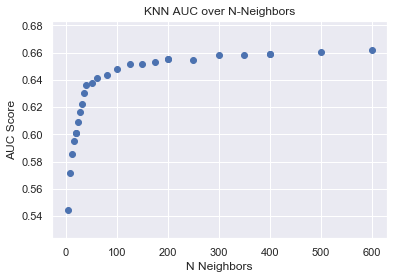

In [6]:
x = [3, 7, 11, 15, 19, 19, 23, 27, 31, 35, 39, 50, 60, 80, 100, 125, 150, 175, 200, 200, 250, 300, 350, 400, 400, 500, 600]
knn_AUC_means = [0.54479748, 0.57184604, 0.5852932 , 0.59513264, 0.60120883, 0.60120883, 0.60896516, 0.61627274, 0.62263232, 0.63040065,
       0.63615329, 0.63783752, 0.64099169, 0.64338975, 0.64766161, 0.65137785, 0.65149116, 0.65325445, 0.6551905, 0.6551905 , 0.65488796, 0.65824526, 0.65794263, 0.6590553, 0.65905535, 0.66007587, 0.66221001]
plt.scatter(x=x, y=knn_AUC_means)
plt.title('KNN AUC over N-Neighbors')
plt.xlabel('N Neighbors')
plt.ylabel('AUC Score')

---

For n_neighbors, could pick either 200 or the range 40-50. Going for 200 for that sweet sweet AUC.

Check final KNN model with model_fit function and 1/3 of total available training data instead of 1/10. 
Hoping to achieve ~0.66 AUC

---

In [10]:
x_train, y_train, x_test, y_test = train_test_split(train, target,test_size=2/3, random_state=42)

model = KNeighborsClassifier(n_neighbors=200)
model_fit(model, x_train, x_test)

Seconds to start: 0.00
Seconds to fit: 0.39
CV Score : Mean - 0.662 | Std - 0.005 | Min - 0.655 | Max - 0.670
Seconds to CV: 987.14


---

Huzzah! AUC of 0.662 w/ k=200. Done with KNN now. It was much closer to logistic regression than I had first anticipated.

---

## Random Forest

In [87]:
parameters = {}
grid_searcher(RandomForestClassifier(), train, target, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 82.34
Grid Scores: 

{'mean_fit_time': array([43.77107728]),
 'mean_score_time': array([0.47911048]),
 'mean_test_score': array([0.589808]),
 'mean_train_score': array([0.99974094]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.59414754]),
 'split0_train_score': array([0.99975338]),
 'split1_test_score': array([0.58403182]),
 'split1_train_score': array([0.99972242]),
 'split2_test_score': array([0.59000421]),
 'split2_train_score': array([0.99971714]),
 'split3_test_score': array([0.59104838]),
 'split3_train_score': array([0.99977085]),
 'std_fit_time': array([0.46477554]),
 'std_score_time': array([0.02135924]),
 'std_test_score': array([0.00366651]),
 'std_train_score': array([2.21312073e-05])}
Best Model Parameters: {}
Best Model Score: 0.5898


### n_features

### max_depth

### min_samples_split

### min_samples_leaf

### max_features

### learning_rate

## Gradient Boost

## Adaptive Boost

## XGBoost